# House price prediction
---

In [79]:
# Load libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
warnings.filterwarnings('ignore')
%matplotlib inline

### Initially, we load the datasets.

In [80]:
# Load datasets
DataFrame_Train = pd.read_csv('house-prices/train.csv')
DataFrame_Test = pd.read_csv('house-prices/test.csv')

# Descriptive statistics summary
DataFrame_Test.describe()



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000])),
 (74160.16474519415, 180921.19589041095, 0.9319665641512986))

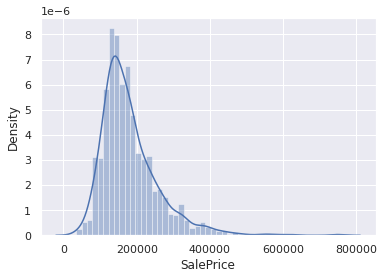

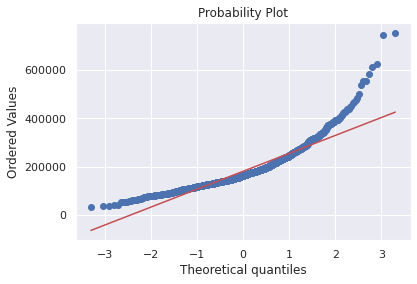

In [81]:
sns.distplot(DataFrame_Train['SalePrice'])
plt.figure()
stats.probplot(DataFrame_Train['SalePrice'], plot=plt)

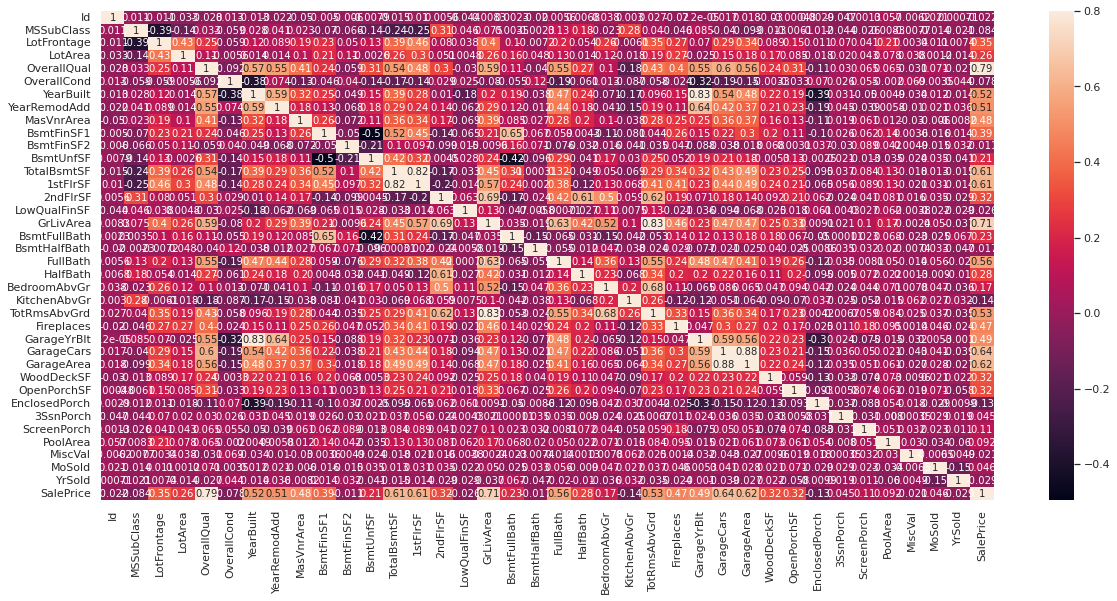

In [82]:
# Correlation matrix
CorrelationMatrix = DataFrame_Train.corr()
f, ax = plt.subplots(figsize=(20, 9))
Graphic_1 = sns.heatmap(CorrelationMatrix, vmax=.8, annot=True) 

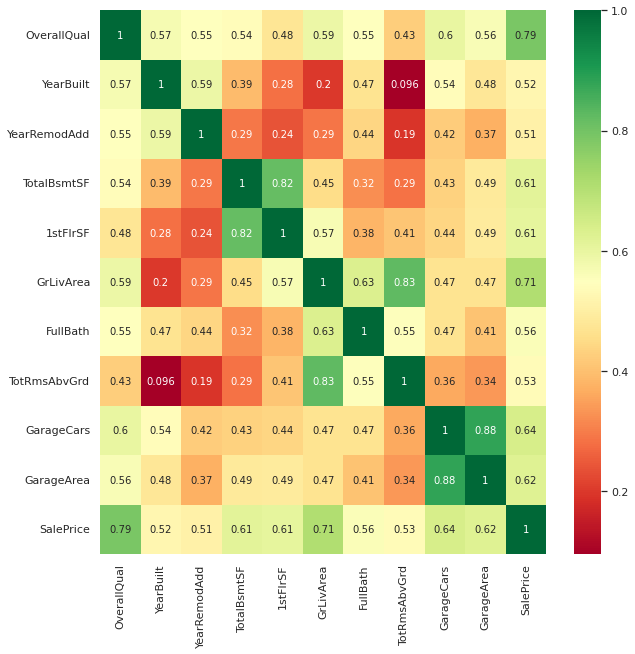

In [83]:
# Most correlated features
Top_CorrelationFeatures = CorrelationMatrix.index[abs(CorrelationMatrix["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
Graphic_2 = sns.heatmap(DataFrame_Train[Top_CorrelationFeatures].corr(),annot=True,cmap="RdYlGn")

In [84]:
print("Find most important features relative to target")
CorrelationMatrix.sort_values(["SalePrice"], ascending = False, inplace = True)
print(CorrelationMatrix.SalePrice)

Find most important features relative to target
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   

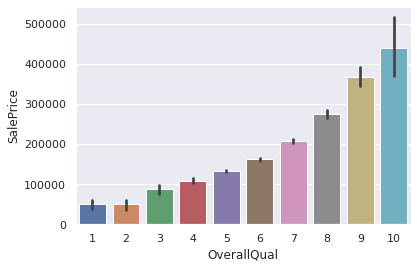

In [85]:
# Ploting most correlated features
Graphic_3 = sns.barplot(DataFrame_Train.OverallQual,DataFrame_Train.SalePrice)


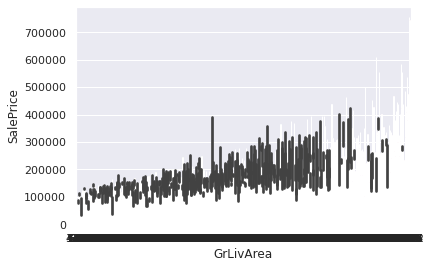

In [86]:
Graphic_4 = sns.barplot(DataFrame_Train.GrLivArea,DataFrame_Train.SalePrice)

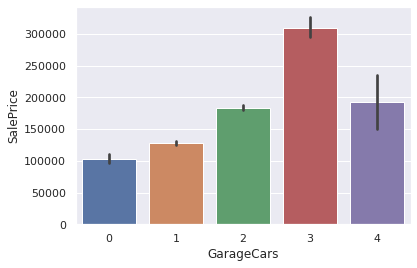

In [87]:
Graphic_5 = sns.barplot(DataFrame_Train.GarageCars,DataFrame_Train.SalePrice)

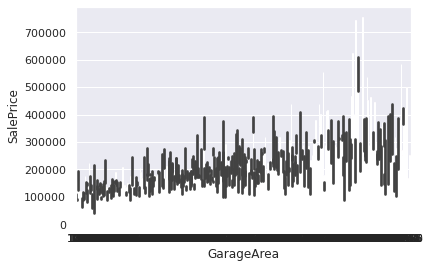

In [88]:
Graphic_6 = sns.barplot(DataFrame_Train.GarageArea,DataFrame_Train.SalePrice)

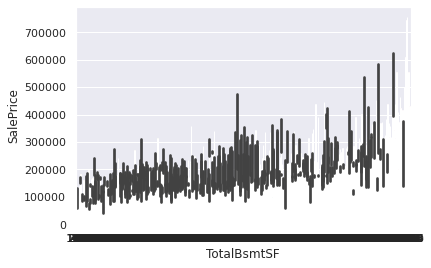

In [89]:
Graphic_7 = sns.barplot(DataFrame_Train.TotalBsmtSF,DataFrame_Train.SalePrice) 

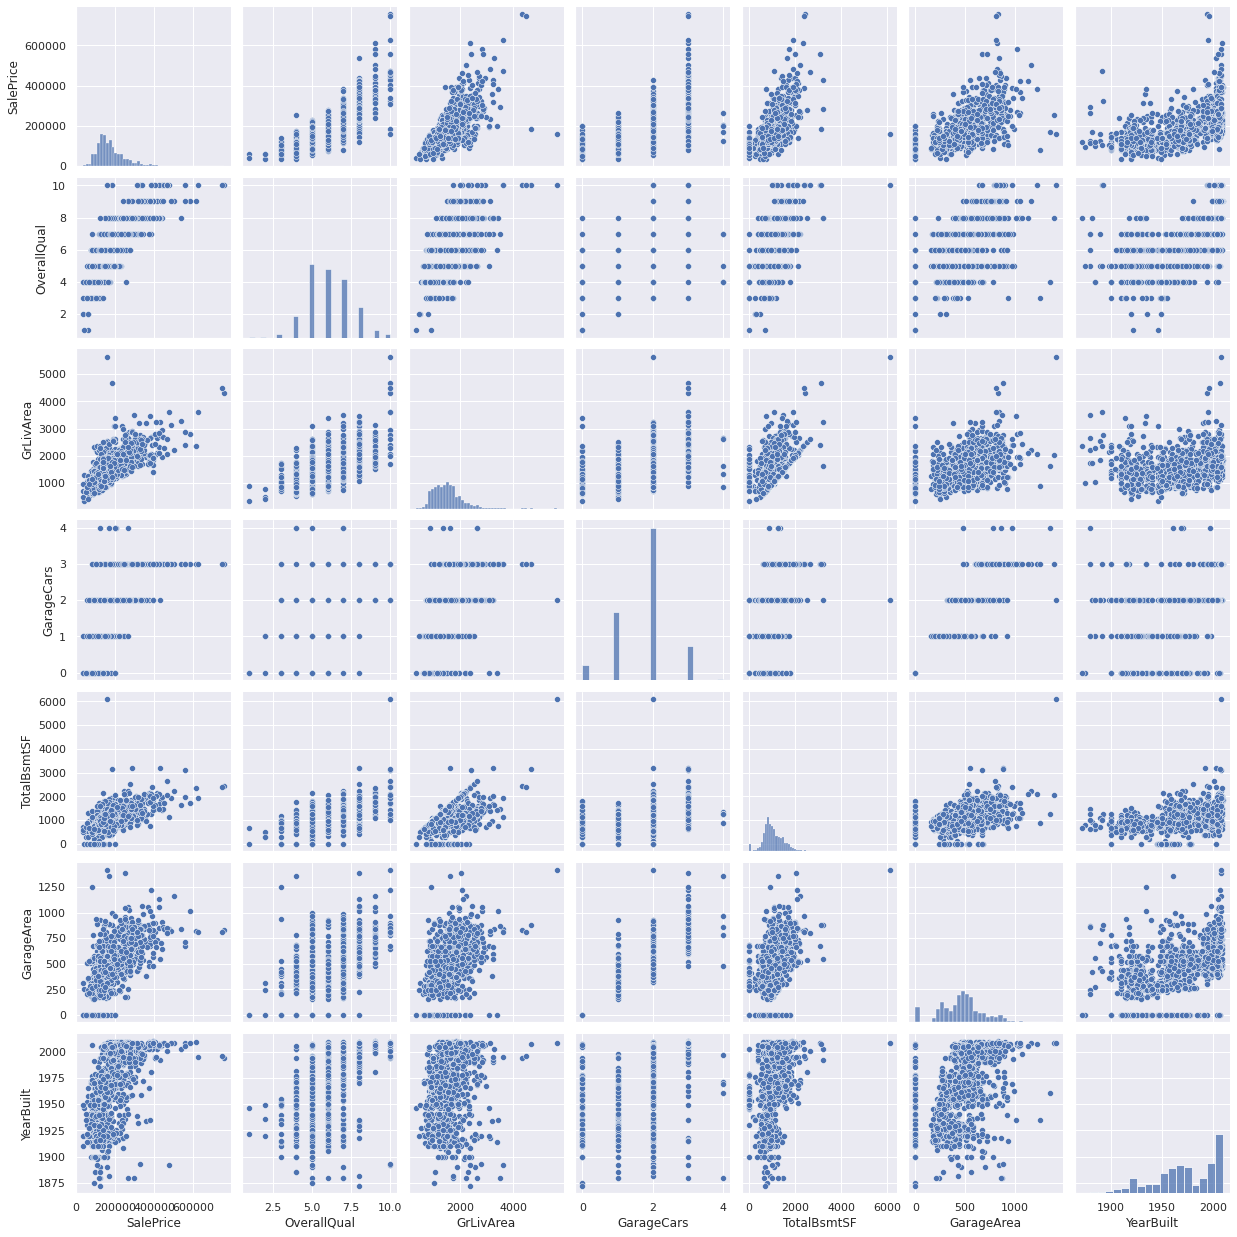

In [90]:
# Scatterplot
Set_1 = sns.set()
Columns = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'GarageArea', 'YearBuilt']
sns.pairplot(DataFrame_Train[Columns], size = 2.5)
plt.show()

In [91]:
# Missing data
Total_MD = DataFrame_Train.isnull().sum().sort_values(ascending=False)
Percent_MD = (DataFrame_Train.isnull().sum()/DataFrame_Train.isnull().count()).sort_values(ascending=False)
MissingData = pd.concat([Total_MD, Percent_MD], axis=1, keys=['Total', 'Percent'])
MissingData.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479


In [92]:
# Applying log transformation
DataFrame_Train.SalePrice = np.log1p(DataFrame_Train.SalePrice )
y = DataFrame_Train.SalePrice

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46027076, 10.47197813, 10.54273278, ..., 13.34550853,
         13.52114084, 13.53447435])),
 (0.398259646654151, 12.024057394918403, 0.9953761551826701))

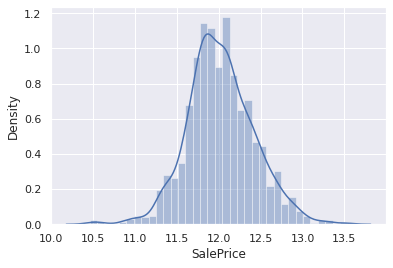

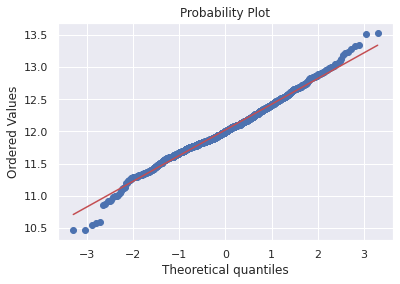

In [93]:
sns.distplot(DataFrame_Train['SalePrice'])
plt.figure()
stats.probplot(DataFrame_Train['SalePrice'], plot=plt)

In [94]:
# Differentiate numerical features (minus the target) and categorical features
CategoricalFeatures = DataFrame_Train.select_dtypes(include=['object']).columns
CategoricalFeatures

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [95]:
NumericalFeatures = DataFrame_Train.select_dtypes(exclude=['object']).columns
NumericalFeatures

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [96]:
# Differentiate numerical features (minus the target) and categorical features
NumericalFeatures = NumericalFeatures.drop("SalePrice")
print("Numerical features : " + str(len(NumericalFeatures)))
print("Categorical features : " + str(len(CategoricalFeatures)))
Train_Numerical = DataFrame_Train[NumericalFeatures]
Train_Categorical = DataFrame_Train[CategoricalFeatures]

Numerical features : 37
Categorical features : 43


In [97]:
# Handle remaining missing values for numerical features by using median as replacement
print("NAs for numerical features in train : " + str(Train_Numerical.isnull().values.sum()))
Train_Numerical = Train_Numerical.fillna(Train_Numerical.median())
print("Remaining NAs for numerical features in train : " + str(Train_Numerical.isnull().values.sum()))

NAs for numerical features in train : 348
Remaining NAs for numerical features in train : 0


In [98]:
from scipy.stats import skew 
skewness = Train_Numerical.apply(lambda x: skew(x))
skewness.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.674865
LotFrontage       2.406671
OpenPorchSF       2.361912
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
BsmtUnfSF         0.919323
2ndFlrSF          0.812194
OverallCond       0.692355
TotRmsAbvGrd      0.675646
HalfBath          0.675203
Fireplaces        0.648898
BsmtFullBath      0.595454
OverallQual       0.216721
MoSold            0.211835
BedroomAbvGr      0.211572
GarageArea        0.179796
YrSold            0.096170
FullBath          0.036524
Id                0.000000
GarageCars       -0.342197
YearRemodAdd     -0.503044
YearBuilt        -0.612831
GarageYrBlt      -0.677636
d

In [99]:
#convert categorical variable into dummy
Train_Categorical.shape

(1460, 43)

In [100]:
Train_Categorical = pd.get_dummies(Train_Categorical)
Train_Categorical.shape

(1460, 252)

In [101]:
Train_Categorical.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [102]:
DataFrame_Train = pd.concat([Train_Categorical,Train_Numerical],axis=1)
DataFrame_Train.shape

(1460, 289)

In [103]:

#split the data to train the model 
X_train,X_test,y_train,y_test = train_test_split(DataFrame_Train,y,test_size = 0.3,random_state= 0)
X_train.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
64,0,0,0,1,0,0,1,0,0,0,...,645,576,36,0,0,0,0,0,2,2009
682,0,0,0,1,0,0,1,0,0,0,...,431,307,0,0,0,0,0,0,11,2008
960,0,0,0,1,0,0,1,0,0,1,...,0,117,0,0,0,0,0,0,2,2010
1384,0,0,0,1,0,0,1,0,0,0,...,280,0,0,0,0,0,0,0,10,2009
1100,0,0,0,1,0,0,1,0,0,0,...,246,0,0,0,0,0,0,0,1,2009


In [104]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 289), (438, 289), (1022,), (438,))

In [105]:
n_folds = 5
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(DataFrame_Train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(DataFrame_Train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [106]:
Regression = LinearRegression()
Regression.fit(X_train, y_train)
Test_Prediction = Regression.predict(X_test)
Train_Prediction = Regression.predict(X_train)

print('rmse on train',rmse_CV_train(Regression).mean())
print('rmse on train',rmse_CV_test(Regression).mean())


rmse on train 2939.0354258177613
rmse on train 0.2513256019837566


In [107]:
from sklearn import linear_model
# Create a Lasso regressor
Regression_Lasso = linear_model.Lasso(alpha=.3)
Regression_Lasso.fit(X_train, y_train) 

# Are the coeficients now sparse?
print('Training Score:', Regression_Lasso.score(X_train, y_train))
print('Testing Score:', Regression_Lasso.score(X_test, y_test))
# Is the score almost the same?
print('Training MSE: ', np.mean((Regression_Lasso.predict(X_train) - y_train)**2))
print('Testing MSE: ', np.mean((Regression_Lasso.predict(X_test) - y_test)**2))

Training Score: 0.8177475682026158
Testing Score: 0.6954490512139684
Training MSE:  0.02944445304559529
Testing MSE:  0.04705595223367459


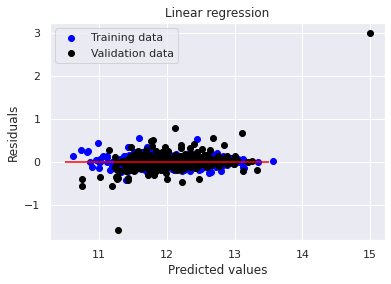

In [108]:
plt.scatter(Train_Prediction, Train_Prediction - y_train, c = "blue",  label = "Training data")
plt.scatter(Test_Prediction, Test_Prediction - y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

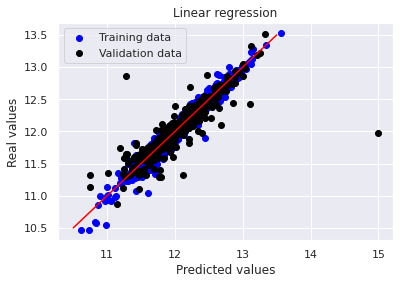

In [109]:
plt.scatter(Train_Prediction, y_train, c = "blue",  label = "Training data")
plt.scatter(Test_Prediction, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()